In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [96]:
db.collection_names()
hits = db.hits
ts = db.tasksets

In [97]:
hits = db.hits
list(hits.find({},{'_id':1}))

[{u'_id': ObjectId('55911fb049eb7fef15c0f5c2')},
 {u'_id': ObjectId('55a48ddcc8f17da574db50b7')}]

## Task completion times

Let's compare basic stats for completion times between different conditions.

In [117]:
times = ts.aggregate([
    {'$match':{'user':{'$ne':"Peter"}}},
    {'$unwind':'$tasks'},
    {'$project':{'timeSpent':'$tasks.timeSpent', 'user':1,'hit_id':1}},
])
a = pd.DataFrame(list(times))
a

,_id,hit_id,timeSpent,user
0,3OUYGIZWR7YNQWQPFE8DX4A3WOP0PK,55a48ddcc8f17da574db50b7,4.049,A2EAN17FAA9AQF
1,35K3O9HUABDAQ9GP9IBN6ZY3OJDFEJ,55a48ddcc8f17da574db50b7,3.989,A29XA852FOGMP4
2,35K3O9HUABDAQ9GP9IBN6ZY3OJDFEJ,55a48ddcc8f17da574db50b7,6.186,A29XA852FOGMP4
3,3GNCZX450INJR9O77G56MAMG5A5APP,55a48ddcc8f17da574db50b7,17.326,A319T8VZMWKGP9
4,3GNCZX450INJR9O77G56MAMG5A5APP,55a48ddcc8f17da574db50b7,15.174,A319T8VZMWKGP9
5,3GNCZX450INJR9O77G56MAMG5A5APP,55a48ddcc8f17da574db50b7,21.464,A319T8VZMWKGP9
6,3TDXMTX3CBUQNLP048YAX8JINDJI6U,55a48ddcc8f17da574db50b7,24.756,A7V4CVENA0DYV
7,3TDXMTX3CBUQNLP048YAX8JINDJI6U,55a48ddcc8f17da574db50b7,24.388,A7V4CVENA0DYV
8,3ATTHHXXWAO3609W5V70XLW2KHJIXP,55a48ddcc8f17da574db50b7,21.143,A12I9503PNRFXZ
9,3ATTHHXXWAO3609W5V70XLW2KHJIXP,55a48ddcc8f17da574db50b7,28.747,A12I9503PNRFXZ


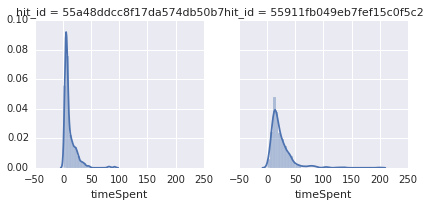

In [106]:
g = sns.FacetGrid(a, col='hit_id', margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(sns.distplot, "timeSpent", bins=bins)

In [111]:
a.groupby('hit_id').mean()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,23.879284
55a48ddcc8f17da574db50b7,11.459299


In [109]:
a.groupby('hit_id').median()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,18.3165
55a48ddcc8f17da574db50b7,6.9390


In [122]:
a.groupby('hit_id').count('timeSpent')

,_id,timeSpent,user
hit_id,,,
55911fb049eb7fef15c0f5c2,500,500,500
55a48ddcc8f17da574db50b7,500,498,500
